In [25]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv("authors.csv")
df.rename(columns={"count": "weight"}, inplace=True)
df

,author,coauthor,weight
0,Biecek P,Wróblewska A,2
1,Dembińska A,Wesołowski J,1
2,Domitrz W,Janeczko S,4
3,Dębski M,Grytczuk J,8
4,Dębski M,Lonc Z,7
5,Dębski M,Okrasa K,1
6,Dębski M,Rzążewski P,7
7,Ganzha M,Mańdziuk J,1
8,Ganzha M,Paprzycki M,56
9,Ganzha M,Wróblewska A,3


In [27]:
graph = nx.from_pandas_edgelist(df, source='author', target='coauthor', edge_attr='weight')

In [28]:
cc = list(nx.connected_components(graph))
cc

[{'Biecek P',
  'Ganzha M',
  'Grzenda M',
  'Luckner M',
  'Mańdziuk J',
  'Paprzycki M',
  'Wróblewska A',
  'Żychowski A'},
 {'Dembińska A', 'Wesołowski J'},
 {'Domitrz W', 'Janeczko S'},
 {'Dębski M',
  'Grytczuk J',
  'Lonc Z',
  'Okrasa K',
  'Pilipczuk M',
  'Rzążewski P'},
 {'Grzegorzewski P', 'Gągolewski M'},
 {'Homenda W', 'Jastrzębska A'},
 {'Pilitowska A', 'Romanowska A'}]

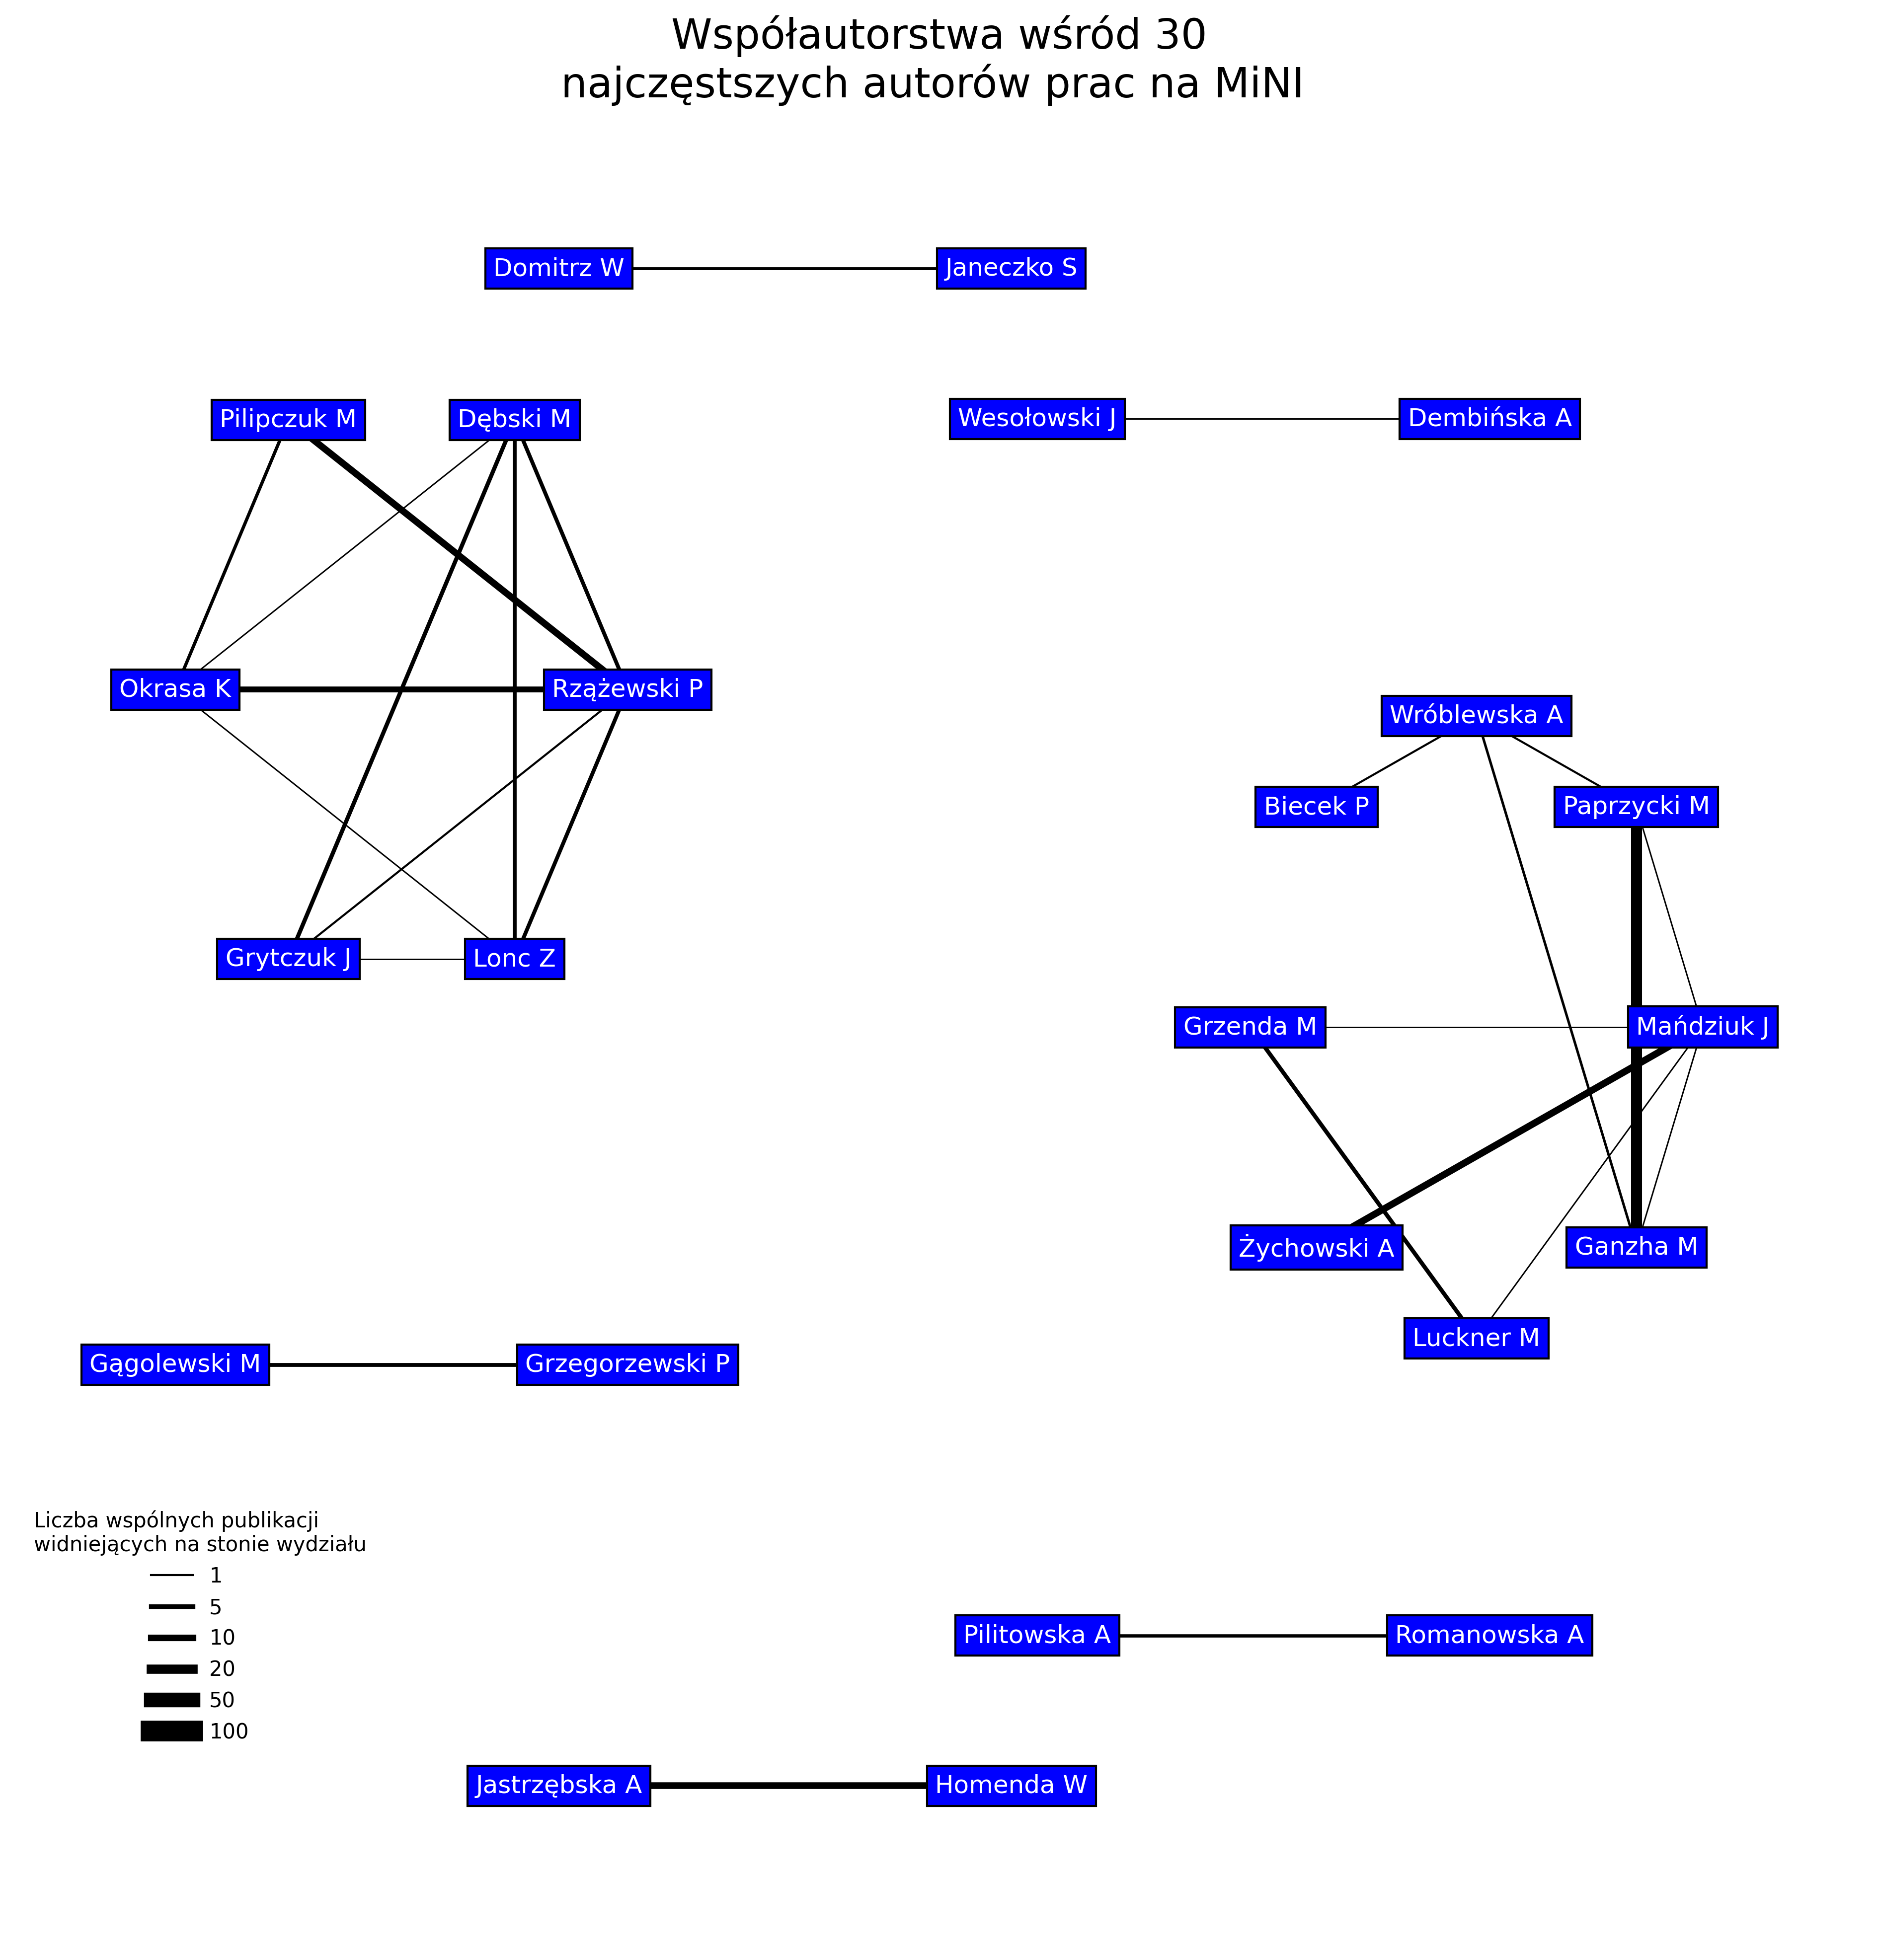

In [10]:
centers = nx.circular_layout(nx.cycle_graph(len(cc)), scale=5)

pos = {}
for c, center in zip(cc, centers.values()):
    pos.update(nx.circular_layout(nx.subgraph(graph, c), center=center, scale=2))

fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)

ax.set_title("Współautorstwa wśród 30\nnajczęstszych autorów prac na MiNI ", fontsize=20)

nx.draw(graph, with_labels=True, pos=pos,
        bbox=dict(facecolor='blue', alpha=1), font_size=12, font_color="white",
        width=[np.sqrt(e[2]["weight"]/2) for e in graph.edges(data=True)],
        ax=ax)

for w in [1, 5, 10, 20, 50, 100]:
    ax.plot([], [], "black", linewidth=np.sqrt(w), label=w)
ax.legend(title="Liczba wspólnych publikacji\nwidniejących na stonie wydziału", frameon=False, bbox_to_anchor=(0, 0.1), loc = "lower left")

fig.savefig("graph.png", dpi = 300)